# NLE Assignment: Sentiment Classification

Investigating NLP methods for distinguishing positive and negative reviews written about movies.



The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [4]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHALAKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHALAKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\SHALAKA\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [5]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [6]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['an', 'energetic', ',', 'visually', 'stunning', ',', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [7]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# function to remove puntuations and stop words
def normalise(wordlist):
    stop = stopwords.words('english')
    lowered=[word.lower() for word in wordlist]
    filtered=[word for word in lowered if word.isalpha() and word not in stop]
    return filtered

# function to create wordlists for positive and negative words

def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

# normalizing the wordlist and removing stop words and punctuation. 

training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]

# storing the normalized worlists according to the labels, i.e, postive or negative 
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist

# generating top 10 postive and negative words
top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,10)
print("The top 10 positive words are: ", top_pos)

top_neg = most_frequent_words(neg_freq_dist,pos_freq_dist,10)
print("The top 10 negative words are : " ,top_neg)


The top 10 positive words are:  ['film', 'life', 'also', 'great', 'story', 'well', 'best', 'world', 'many', 'films']
The top 10 negative words are :  ['bad', 'movie', 'plot', 'even', 'worst', 'stupid', 'nothing', 'could', 'boring', 'least']


As the corpus movie_reviews contains both postive and negative reviews the split_data() takes the length of the total movie_review corpus, divides it by 2 and partitions the corpus into training data and test data. This data is then used for analyzing the sentiments.The next function "get_train_test_data()" is used to split positive and negative data into training and testing sets which is stored in training_data and testing_data. Now we have the data ready in both training and testing. For analyzing the sentiment we have to check the reviews in both data sets. 

As there is a lot of data, to minimize the redundancy the "normalise()" function is used. The function will remove the words that are more commonly used and carry very little information.For example words like "a", "the", "and" "an" ,  and punctuations like ",", "!", "." , occur in every sentence, such type of words are known as stop words and if we take these words and punctuations into consideration we cannot judge the tone of the sentiment or we cannot find the context of the sentences using these words. If we keep all such words and punctuations in the data, the data will be huge and there will be a lot of ambiguity. By Removing stop words the data size will decrease, the words which carry meanings and help in analyzing the tone of the sentence will be available for the analysis and hence the accuracy will be improved.The "normalise()" function will aslo convert the words in lowercase thus removing the duplicates and store the result in a varialble. 

The function "most_frequent_words" is used to genearte the frequently used words in positive training data and negative training data. The function will give the words with respect to how often each of those words occur in total in positive and negative training data and thus its easy to figure out if the word represents positive or negative sentiment.

The pos_freq_dist consists of wordlist with positive label and the neg_freq_dist consists of wordlist with negative label. The wordlists in the pos_freq_dist and neg_freq_dist is given to the function "most_frequent_words" to generate the most frequent words that are representative of positve and negative reviews in the training data. We have taken top 10 frequently occuring words in positive raining data and negative training data.

2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [8]:
from nltk.classify.api import ClassifierI
import random

class SimpleClassifier(ClassifierI): 

    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, doc): 
        #doc is a FreqDist
        score = 0
        
        
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value
        
        return "neg" if score < 0 else "pos" 

     
        return [self.classify(doc) for doc in docs] 

    def labels(self): 
        return ("pos", "neg")
    


    
class SimpleClassifier_mf(SimpleClassifier):
    
    def __init__(self,k):
        self._k=k
    
    def train(self,training_data):
        
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist
                
        self._pos=most_frequent_words(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=most_frequent_words(neg_freq_dist,pos_freq_dist,self._k)
        


movieclassifier=SimpleClassifier_mf(100)
movieclassifier.train(training_norm)
checkpoint,labels=zip(*training_norm)
movieclassifier.classify_many(checkpoint)


['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',


In class "SimpleClassifier", the ClassifierI interface is used to classify the positive and negative reviews. ClassifierI is a standard interface for “single-category classification”, in which the set of categories is known, the number of categories is finite, and each text belongs to exactly one category. In function "classify" the doc is FreqDist. Frequency Distribition(FreqDist)is a representation either in a graphical or tabular format, that displays the number of observations within a given interval or categories.One column records the unique variable’s name, another column records the number of observations or occurrences of each unique value.In the above function, the FreqDist() function iterates over the doc and checks if the word is in self._pos, if the word belongs to self._pos the score is increased by 1 and if the word belongs to self._neg the score is decreased by 1.Here score acts as an counter and eeps a track of all the unique words and the number of occurences in positive or negative data sets. It returns "pos" if the value of score is greater than 0 and "neg" if the value of score is smaller than 0. 

The class SimpleClassifier_mf inherits the properties of class "SimpleClassifier" and generates the list of positive and negative words in pos_freq_dist and neg_freq_dist. The pos_freq_dist consists of wordlist with positive label and the neg_freq_dist consists of wordlist with negative label and the function gives the top k most frequent positive or negative words occuring in the wordlist. 

Python zip() method takes iterable and returns a single iterator object, having mapped values from all the iterables. It is used to map the similar index of multiple containers so that they can be used using a single entity. The zip(*training_norm) iterates through the training_norm and gives the wordlist and its label and stores the values in a list form.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [9]:

class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
  
    def calculate_values(self):
        p= 0
        r=0
        f1=0
        p = self.TP / (self.TP + self.FP)
        r = self.TP / (self.TP + self.FN)
        f1 = 2*float(p)*float(r)/(p +r)
        
        print("The precision of the classifier is : ", p)
        print("The value of the recall is : ", r)
        print("The F-1 score of the classifier is : ", f1)
        
        return [p, r, f1]
        
        
    
   

In [10]:

movieclassifier1=SimpleClassifier_mf(100)
movieclassifier1.train(training_norm)
docs,labels=zip(*training_norm)
senti_cm=ConfusionMatrix(movieclassifier1.classify_many(docs),labels)

print("The values are""\nTrue Positive: ",senti_cm.TP, "\nFalse Positive-" ,senti_cm.FP, "\nTrue Negative - ", senti_cm.TN, "\nFalse Negative -", senti_cm.FN)
A = senti_cm.calculate_values()
print(A)


The values are
True Positive:  675 
False Positive- 433 
True Negative -  267 
False Negative - 25
The precision of the classifier is :  0.6092057761732852
The value of the recall is :  0.9642857142857143
The F-1 score of the classifier is :  0.7466814159292036
[0.6092057761732852, 0.9642857142857143, 0.7466814159292036]


Accuracy is used to calculate the closeness of a measured value to a known value. In instances where we have to calculate how exact the model's predictions are, we use Precision. Recall measures how well the model can recall the postive labels that the model identifies as postive. To combine precision and recall in a sigle metric we calculate F1-score. 


When data is balanced accuracy is good measure to calculate, but when the data is imbalanced calculating accuracy will not give the correct results. The data sets in which the class distribution are not balanced within the classes are known as Imbalnaced data sets.  Imbalanced data sets have a bias towards larger classes as certain algorithms cannot handle huge data with imbalanced data sets. As a result, data sets with fewer points are treated as noise and are often ignored. Therefore accuracy metric is not relevant for evaluating performance on imbalnaced data sets.  


For example if a data has more than 2 classes , we can get accuracy of more than 80% but we would not know if all the classes were predicted euqally. Condiser an exmaple of calculating the accuracy of mail classification where the mails are classified into spam and not-spam. The count of spam emails is considerably very low than the number of not-spam emails . So, the original distribution of two classes leads to an imbalanced dataset. Therefore if  we have a balanced dataset accuracy will calculate the correct values. 

4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

In [11]:
# \creating a \naive Bayes classifier 

from nltk.classify.api import ClassifierI
import math
import pandas as pd

class NBClassifier(ClassifierI):
    
    def __init__(self):
        
        pass
    
    def _set_known_vocabulary(self,training_data):
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)
    
    def _set_priors(self,training_data):
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors
        
    def _set_cond_probs(self,training_data):       
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1
        
            conds[label]=classcond
    
        for label, classcond in conds.items():
            for word in self.known:
        
                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond
            
        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}
        
        self.conds=conds
    
    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)
    
    def classify(self,doc):
        #add your code here
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)

In [12]:
my_NB = NBClassifier()
my_NB.train(training_norm)
docs,labels=zip(*training_norm)
cm=ConfusionMatrix(my_NB.classify_many(docs),labels,classes=('pos','neg'))

B= cm.calculate_values()
print(B)



The precision of the classifier is :  0.9985590778097982
The value of the recall is :  0.99
The F-1 score of the classifier is :  0.994261119081779
[0.9985590778097982, 0.99, 0.994261119081779]


In [13]:
movieclassifier1=SimpleClassifier_mf(100)
movieclassifier1.train(training_norm)
docs,labels=zip(*training_norm)
senti_cm=ConfusionMatrix(movieclassifier1.classify_many(docs),labels)
print(senti_cm.calculate_values())

The precision of the classifier is :  0.6092057761732852
The value of the recall is :  0.9642857142857143
The F-1 score of the classifier is :  0.7466814159292036
[0.6092057761732852, 0.9642857142857143, 0.7466814159292036]


In [14]:
C =['accuracy', 'precision', 'F1-score']

df1 = pd.DataFrame(A, C)
df1['NB_Classifier']= B

df1.rename(columns={0:"Word_list_Classifier",1: "NB_Classifier"}, inplace = True)
df1


,Word_list_Classifier,NB_Classifier
accuracy,0.609206,0.998559
precision,0.964286,0.990000
F1-score,0.746681,0.994261


As we can see in the above table, the accuracy , precision and F1-score is more accurate in Naive_bayes classifier than the Word_list classifier. The Naive Bayes classifier is faster as compared to word_list classifier. This means when calculating the results on a big data set the Naive Bayes classifier will be more reliable. Naive Bayes predicts the class of the data set very fast and easily. 

The disadvantage of Naive Bayes is that it requires training to train the data to give accurate results. So Naive Bayes can suffer from the zero probability problem, when a particular attribute's conditional probability equals zero it will fail to predict the result. 




5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


The accuracy of Word List MF classifier is 0.6728571428571428
The accuracy of Word List Thresh classifier is 0.5421428571428571


,0,1
0,Word List MF,0.672857
1,Word List Thresh,0.542143


{1: {'Word List MF': 0.5083333333333333, 'Word List Thresh': 0.5},
 10: {'Word List MF': 0.5566666666666666, 'Word List Thresh': 0.5},
 50: {'Word List MF': 0.6447619047619048, 'Word List Thresh': 0.5},
 100: {'Word List MF': 0.6673809523809523,
  'Word List Thresh': 0.5142857142857142},
 200: {'Word List MF': 0.6766666666666666,
  'Word List Thresh': 0.5321428571428571},
 400: {'Word List MF': 0.6583333333333333,
  'Word List Thresh': 0.5783333333333334},
 600: {'Word List MF': 0.6735714285714285,
  'Word List Thresh': 0.5783333333333334},
 700: {'Word List MF': 0.6714285714285715,
  'Word List Thresh': 0.5421428571428571}}

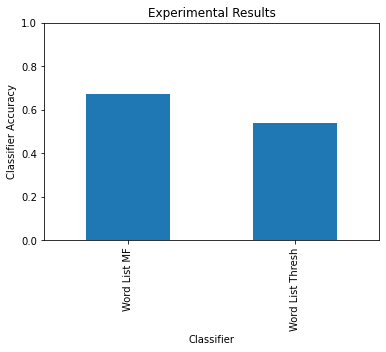

In [17]:
def classifier_evaluate(cls, train_data):
   
    acc = 0
    docs,goldstandard=zip(*training_norm)
    
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1
    
    return acc / (len(training_norm))

def above_threshold(posfreq,negfreq,threshold):
  difference=posfreq-negfreq
  sorteddiff=difference.most_common()
  filtered=[w for (w,f) in sorteddiff if f>threshold]
  return filtered

class SimpleClassifier_ot(SimpleClassifier):
    
    def __init__(self,k):
        self._k=k
    
    def train(self,training_norm):
        
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_norm:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist
                
        self._pos=above_threshold(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=above_threshold(neg_freq_dist,pos_freq_dist,self._k)
training,testing=get_train_test_data()



word_list_size = 100
threshold=100
classifiers={"Word List MF":SimpleClassifier_mf(word_list_size),
             "Word List Thresh":SimpleClassifier_ot(threshold)}

results=[]
for name,classifier in classifiers.items():
    classifier.train(training_norm)
    accuracy=classifier_evaluate(classifier,testing)
    print("The accuracy of {} classifier is {}".format(name,accuracy))
    results.append((name,accuracy))
             
df = pd.DataFrame(results)
display(df)
ax = df.plot.bar(title="Experimental Results",legend=False,x=0)
ax.set_ylabel("Classifier Accuracy")
ax.set_xlabel("Classifier")
ax.set_ylim(0,1.0)


from random import sample

sample_sizes=[1,10,50,100,200,400,600, 700]
results={}
number_of_runs = 3

for size in sample_sizes:
    res={}

    for i in range(number_of_runs):
        training,testing=get_train_test_data()
        
        positive_training=[(doc,label) for (doc,label) in training_norm if label=="pos"]
        negative_training=[(doc,label) for (doc,label) in training_norm if label=="neg"]
        training_sample=sample(positive_training,size)+sample(negative_training,size)
        for name,classifier in classifiers.items():
      
            classifier.train(training_sample)
            accuracy=classifier_evaluate(classifier,testing)
            #print("The accuracy of {} classifier with training sample size {} is {}".format(name,size, accuracy))
            res[name]=res.get(name,0)+accuracy/number_of_runs
    results[size]=res

    
results




In [18]:
df=pd.DataFrame(results)
df=df.transpose()
df


,Word List MF,Word List Thresh
1,0.508333,0.500000
10,0.556667,0.500000
50,0.644762,0.500000
100,0.667381,0.514286
200,0.676667,0.532143
400,0.658333,0.578333
600,0.673571,0.578333
700,0.671429,0.542143


Text(0.5, 0, 'Sample Size')

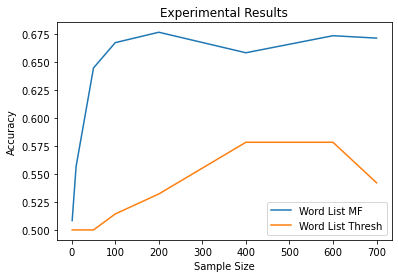

In [19]:
ax = df.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Sample Size")

From the above graph it can be seen that as the number of sample size increases, the performance of the wordlist classifier is steady till the sample size is 200. as the sample size increases, the performance starts decreasing. The performance of the classifier drasticall gos down asfter the sample size reaches 600 .

As the data set is large it also takes more time to calculate the results and hence it will be time consuming to use wordlist classifier on huge data sets. 

Naive Bayes on the other hand is more accurate in calculating the accuracy of the model and is faster than the wordlist classifier.Naive Bayes should be used for solving multiple class assumption problems. It is therefore recommended to use Naive Bayes on huge data sets to get the correct results without consuming much time.

I would recommend naive bayes classifer for the following reasons :

1. It is simple to implement
2. It takes both scalable and continous data
3. It is fast and can be used to predict in real time 
4. The probabilities are easy to evaluate



In [20]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath= "NLassignment2021.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1222
